In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3.1 Basic Inspection and Exploration

##Problem 1 - Data Read, Write and Inspect:

In [ ]:
#Question 1
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bank .csv')
df.head()
#Identifying the columns where dtypes='object'
col = df.select_dtypes(include=['object']).columns
print(col)
print()
#Uniques values within the column with dtypes='object'
unique_values = df[col].nunique()
print(unique_values)
print()
#Null values in the dataset
null_sum = df.isnull().sum()
print(null_sum)
print()
#Dropping the values with dtypes = object
df_drop = df.drop(col, axis=1)
df_drop.to_csv('banknumericdata.csv', index=False)
#Reading the dataset 'banknumericdata.csv'
df2 = pd.read_csv('/content/banknumericdata.csv')
df2.head()
df2.describe()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64



,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='balance', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='day', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='duration', y='campaign', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['balance'].plot(kind='line', figsize=(8, 4), title='balance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

##Problem 2 - Data Imputations:




In [ ]:
import pandas as pd
dt = pd.read_csv('/content/drive/MyDrive/medical_students_dataset.csv')

# Display the first few rows of the dataset to get an overview of its structure and content.
print("First 5 rows of the dataset:")
print(dt.head())

print("\nDataset Info:")
dt.info()

# Identify columns with missing values
dt_null = dt.isnull().sum()
print("\nColumns with null values:")
print(dt_null[dt_null > 0])

# Create a copy of the dataset to work on. This ensures the original dataset remains unchanged.
dt_filled = dt.copy()

# Fill missing values in categorical columns using the most common value (mode).
categorical_columns = dt.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if dt[col].isnull().sum() > 0:
        dt_filled[col].fillna(dt[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' with mode: {dt[col].mode()[0]}")

# Fill missing values in numerical columns using the mean.
numerical_columns = dt.select_dtypes(include=['number']).columns
for col in numerical_columns:
    if dt[col].isnull().sum() > 0:
        dt_filled[col].fillna(dt[col].mean(), inplace=True)
        print(f"Filled missing values in '{col}' with mean: {dt[col].mean()}")

# Display the dataset after handling missing values to ensure everything looks correct.
print("\nDataset after filling null values:")
print(dt_filled)

# Identify and count duplicate rows in the dataset.
dt_duplicated_sum = dt.duplicated().sum()
print(f"\nNumber of duplicated rows: {dt_duplicated_sum}")

# Remove duplicate rows from the dataset.
dt_no_duplicates = dt_filled.drop_duplicates()
print("\nDataset after removing duplicate rows:")
print(dt_no_duplicates)

# Display the structure of the cleaned dataset to confirm all issues have been addressed.
print("\nFinal Cleaned Dataset Summary:")
dt_no_duplicates.info()


First 5 rows of the dataset:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

<ipython-input-5-525a9c9b0201>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_filled[col].fillna(dt[col].mode()[0], inplace=True)
<ipython-input-5-525a9c9b0201>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Filled missing values in 'Diabetes' with mode: No
Filled missing values in 'Smoking' with mode: No
Filled missing values in 'Student ID' with mean: 49974.042077777776
Filled missing values in 'Age' with mean: 26.02156111111111
Filled missing values in 'Height' with mean: 174.9471026685741
Filled missing values in 'Weight' with mean: 69.97158509186075
Filled missing values in 'BMI' with mean: 23.338869359639226
Filled missing values in 'Temperature' with mean: 98.60094787707668
Filled missing values in 'Heart Rate' with mean: 79.50376666666666
Filled missing values in 'Blood Pressure' with mean: 114.55803333333333
Filled missing values in 'Cholesterol' with mean: 184.4863611111111

Dataset after filling null values:
           Student ID        Age  Gender      Height     Weight Blood Type  \
0            1.000000  18.000000  Female  161.777924  72.354947          O   
1            2.000000  26.021561    Male  152.069157  47.630941          B   
2            3.000000  32.000000  Female 

#3.2 Data Cleaning


##Problem 1

In [44]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
df.head()

#Creating a sub class of the main dataset
titanic_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
titanic_subset.head()

#Dividing the category where Pclass = '1'
first_class_passengers = titanic_subset[titanic_subset['Pclass'] == 1]

#Calculating the fare mean,median,max and min of the first_class_passengers
fare_mean = first_class_passengers['Fare'].mean()
fare_median = first_class_passengers['Fare'].median()
fare_max = first_class_passengers['Fare'].max()
fare_min = first_class_passengers['Fare'].min()

#Displaying the results
print("Statistics for the 'Fare' column of first-class passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")
print(df.columns)

Statistics for the 'Fare' column of first-class passengers:
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


##Problem 2

In [14]:
#Counting the data with value null in Age
null_age_count = titanic_subset['Age'].isnull().sum()
print("Number of null values in the 'Age' column:", null_age_count)
print()

#Dropping the null value Age in Titanic_Subset
titanic_subset_cleaned = titanic_subset.dropna(subset=['Age'])
print(titanic_subset_cleaned)

Number of null values in the 'Age' column: 177

                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
885               Rice, Mrs. William (Margaret Norton)       3  female  39.0   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  

##Problem 3


In [46]:
import pandas as pd

#Use one-hot encoding to convert 'Embarked' column
one_hot_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

#Add new columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

#Drop the original 'Embarked' column
df = df.drop('Embarked', axis=1)

#Print the first few rows of the modified DataFrame
print(df)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

##Problem 4


Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


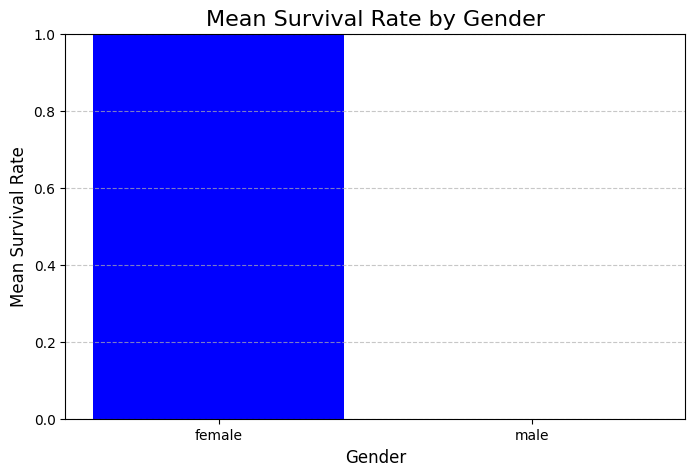

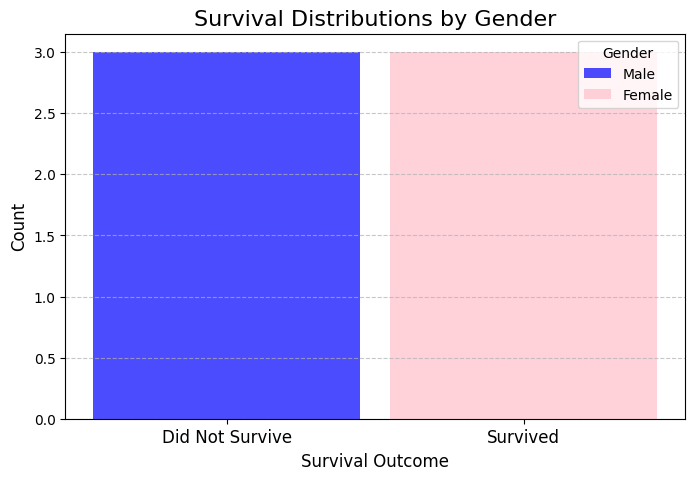

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#Calculate mean survival rates by gender
mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

#Visualization: Bar Plot for Mean Survival Rates
plt.figure(figsize=(8, 5))
plt.bar(mean_survival.index, mean_survival.values, color=['blue', 'pink'])
plt.title('Mean Survival Rate by Gender', fontsize=16)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 1)  # Survival rate ranges between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Visualization: Survival Distribution by Gender (Histogram Equivalent)
plt.figure(figsize=(8, 5))

# Plot male survival outcomes
male_survival = df[df['Sex'] == 'male']['Survived']
plt.hist(male_survival, bins=[-0.5, 0.5, 1.5], alpha=0.7, color='blue', label='Male', rwidth=0.9)

# Plot female survival outcomes
female_survival = df[df['Sex'] == 'female']['Survived']
plt.hist(female_survival, bins=[-0.5, 0.5, 1.5], alpha=0.7, color='pink', label='Female', rwidth=0.9)

plt.title('Survival Distributions by Gender', fontsize=16)
plt.xticks([0, 1], labels=['Did Not Survive', 'Survived'], fontsize=12)
plt.xlabel('Survival Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Problem 5

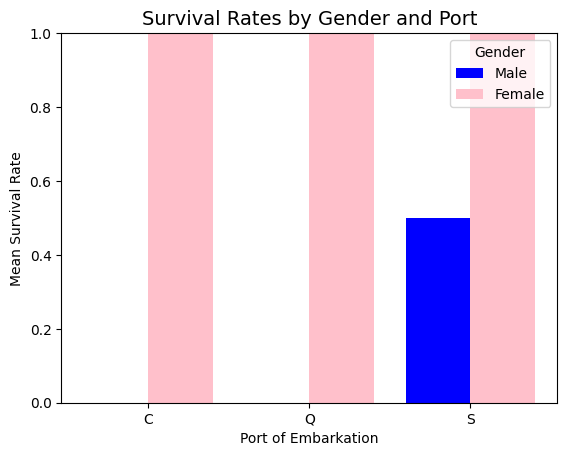

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean survival rates by Sex and Embarked
mean_survival = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()

# Ports of embarkation
ports = ['C', 'Q', 'S']
x = range(len(ports))

# Plot
plt.bar([p - 0.2 for p in x], mean_survival.loc['male', ports], width=0.4, label='Male', color='blue')
plt.bar([p + 0.2 for p in x], mean_survival.loc['female', ports], width=0.4, label='Female', color='pink')

# Add labels and legend
plt.title('Survival Rates by Gender and Port', fontsize=14)
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.xticks(x, ports)
plt.legend(title='Gender')
plt.ylim(0, 1)
plt.show()


##Problem 6 (Optional)

<ipython-input-47-9efcfc063d50>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_class_and_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

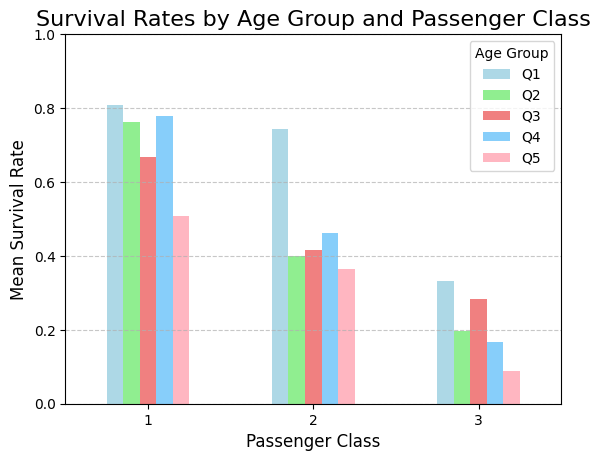

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

#Split 'Age' into 5 quantiles
df['AgeGroup'] = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

#Group by 'Pclass' and 'AgeGroup' and calculate the mean survival rate
mean_survival_by_class_and_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()

#Visualize the mean survival rates
plt.figure(figsize=(10, 6))
mean_survival_by_class_and_age.plot(kind='bar', stacked=False, color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])

plt.title('Survival Rates by Age Group and Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
